In [1]:
import pandas as pd
import csv
data = pd.read_csv('cleaned.csv')
print(data.head())

  Brand Name                Phone Name Display        Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB    6.7″  Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB    6.7″  Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB    6.7″  Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB    6.1″  Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB    6.1″  Apple A17 Pro     3274   

  Storage (GB)  RAM (GB) Price  Camera Max MP  
0       1024GB       8.0  1599           48.0  
1        512GB       8.0  1399           48.0  
2        256GB       8.0  1199           48.0  
3       1024GB       8.0  1399           48.0  
4        512GB       8.0  1199           48.0  


In [2]:
data['Display'] = data['Display'].str.replace('″', '').astype(float)

data['Storage (GB)'] = data['Storage (GB)'].str.replace('GB', '').astype(float)

data['Price'] = data['Price'].replace('[$€£]', '', regex=True).astype(float)

print(data.head())

  Brand Name                Phone Name  Display        Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB      6.7  Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB      6.7  Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB      6.7  Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB      6.1  Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB      6.1  Apple A17 Pro     3274   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  
0        1024.0       8.0  1599.0           48.0  
1         512.0       8.0  1399.0           48.0  
2         256.0       8.0  1199.0           48.0  
3        1024.0       8.0  1399.0           48.0  
4         512.0       8.0  1199.0           48.0  


In [3]:
data['Chipset_Brand'] = 'Other'

chipset_keywords = {
    'Apple': ['Apple'],
    'Google': ['Google Tensor'],
    'Exynos': ['Exynos'],
    'Snapdragon': ['Snapdragon'],
    'Dimensity': ['Dimensity'],
    'Helio': ['Helio'],
    'MT': ['MT'],
    'Nvidia': ['Nvidia'],
    'Unisoc': ['Unisoc']
}

for brand, keywords in chipset_keywords.items():
    for keyword in keywords:
        data.loc[data['Chipset'].str.contains(keyword), 'Chipset_Brand'] = brand
print(data['Chipset_Brand'].value_counts())

Chipset_Brand
Snapdragon    121
Apple          63
Dimensity      43
Exynos         29
Google         22
MT             20
Helio          15
Other           3
Nvidia          2
Unisoc          2
Name: count, dtype: int64


In [4]:
df_encoded = pd.get_dummies(data, columns=['Chipset_Brand'])

print(df_encoded.head())

  Brand Name                Phone Name  Display        Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB      6.7  Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB      6.7  Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB      6.7  Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB      6.1  Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB      6.1  Apple A17 Pro     3274   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  Chipset_Brand_Apple  \
0        1024.0       8.0  1599.0           48.0                 True   
1         512.0       8.0  1399.0           48.0                 True   
2         256.0       8.0  1199.0           48.0                 True   
3        1024.0       8.0  1399.0           48.0                 True   
4         512.0       8.0  1199.0           48.0                 True   

   Chipset_Brand_Dimensity  Chipset_Brand_Exynos  Chipset_Brand_Google  \
0                    False          

In [5]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']

scaler = StandardScaler()

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print(df_encoded.head())

  Brand Name                Phone Name   Display        Chipset   Battery  \
0      Apple  iPhone 15 Pro Max 1024GB -0.152383  Apple A17 Pro -0.241477   
1      Apple   iPhone 15 Pro Max 512GB -0.152383  Apple A17 Pro -0.241477   
2      Apple   iPhone 15 Pro Max 256GB -0.152383  Apple A17 Pro -0.241477   
3      Apple      iPhone 15 Pro 1024GB -0.468956  Apple A17 Pro -0.898871   
4      Apple       iPhone 15 Pro 512GB -0.468956  Apple A17 Pro -0.898871   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  Chipset_Brand_Apple  \
0      2.835724 -0.037408  1599.0      -0.033249                 True   
1      0.849554 -0.037408  1399.0      -0.033249                 True   
2     -0.143532 -0.037408  1199.0      -0.033249                 True   
3      2.835724 -0.037408  1399.0      -0.033249                 True   
4      0.849554 -0.037408  1199.0      -0.033249                 True   

   Chipset_Brand_Dimensity  Chipset_Brand_Exynos  Chipset_Brand_Google  \
0                    Fal

In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(drop='first')
categorical_features = ['Brand Name', 'Chipset']

# 这里假设df_encoded是之前已经定义好的DataFrame
encoded_features = encoder.fit_transform(df_encoded[categorical_features])

# 将稀疏矩阵转换为数组
encoded_features_array = encoded_features.toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# 创建一个新的DataFrame，使用转换为数组的编码特征和生成的特征名
encoded_df = pd.DataFrame(encoded_features_array, columns=encoded_feature_names)

# 重置索引，以便合并时对齐
df_encoded = df_encoded.reset_index(drop=True)

# 合并编码后的特征和原有的DataFrame，排除原来的分类特征列
df_encoded_final = pd.concat(
    [df_encoded.drop(columns=categorical_features), encoded_df], 
    axis=1
)

df_encoded_final.head()


,Phone Name,Display,Battery,Storage (GB),RAM (GB),Price,Camera Max MP,Chipset_Brand_Apple,Chipset_Brand_Dimensity,Chipset_Brand_Exynos,...,Chipset_Snapdragon 8 Gen 2,Chipset_Snapdragon 8 Gen 3,Chipset_Snapdragon 8+ Gen 1,Chipset_Snapdragon 821,Chipset_Snapdragon 835,Chipset_Snapdragon 845,Chipset_Snapdragon 855,Chipset_Snapdragon 870 5G,Chipset_Snapdragon W5+ Gen 1,Chipset_Unisoc UMS512 T618
0,iPhone 15 Pro Max 1024GB,-0.152383,-0.241477,2.835724,-0.037408,1599.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,iPhone 15 Pro Max 512GB,-0.152383,-0.241477,0.849554,-0.037408,1399.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,iPhone 15 Pro Max 256GB,-0.152383,-0.241477,-0.143532,-0.037408,1199.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,iPhone 15 Pro 1024GB,-0.468956,-0.898871,2.835724,-0.037408,1399.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,iPhone 15 Pro 512GB,-0.468956,-0.898871,0.849554,-0.037408,1199.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import json

In [8]:
# 定义特征变量和目标变量
X = df_encoded_final.drop(columns=['Phone Name', 'Price'])
y = df_encoded_final['Price']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归器
rf = RandomForestRegressor(random_state=42)

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # 移除了 'auto'
}

# 使用网格搜索进行超参数优化
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 打印最佳参数和得分
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 使用最佳估计器对测试集进行预测
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 打印评估指标
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.8966299287725195
Mean Squared Error: 8659.03
R-squared: 0.93
Root Mean Squared Error: 93.05


In [9]:
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A17 pro'],
    'Display': [6.7],
    'Battery': [4441],
    'Storage (GB)': [1024],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

# 对新手机的数值特征进行标准化处理
numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']
new_phone_preprocessed[numeric_features] = scaler.transform(new_phone_preprocessed[numeric_features])

price_prediction = best_rf.predict(new_phone_preprocessed)
print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 1189.9166666666667


In [10]:
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A17 Pro'],
    'Display': [6.7],
    'Battery': [4441],
    'Storage (GB)': [1024],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

# 对新手机的数值特征进行标准化处理
numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']
new_phone_preprocessed[numeric_features] = scaler.transform(new_phone_preprocessed[numeric_features])

price_prediction = best_rf.predict(new_phone_preprocessed)
print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 1259.8166666666666


In [11]:
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A17 Pro'],
    'Display': [6.7],
    'Battery': [4441],
    'Storage (GB)': [128],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

# 对新手机的数值特征进行标准化处理
numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']
new_phone_preprocessed[numeric_features] = scaler.transform(new_phone_preprocessed[numeric_features])

price_prediction = best_rf.predict(new_phone_preprocessed)
print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 851.6666666666666


In [12]:
import pickle

# 保存模型
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

# 保存X_train.columns到文件
with open('model_columns.pkl', 'wb') as columns_file:
    pickle.dump(X_train.columns, columns_file)
    
# 保存标准化器到文件
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

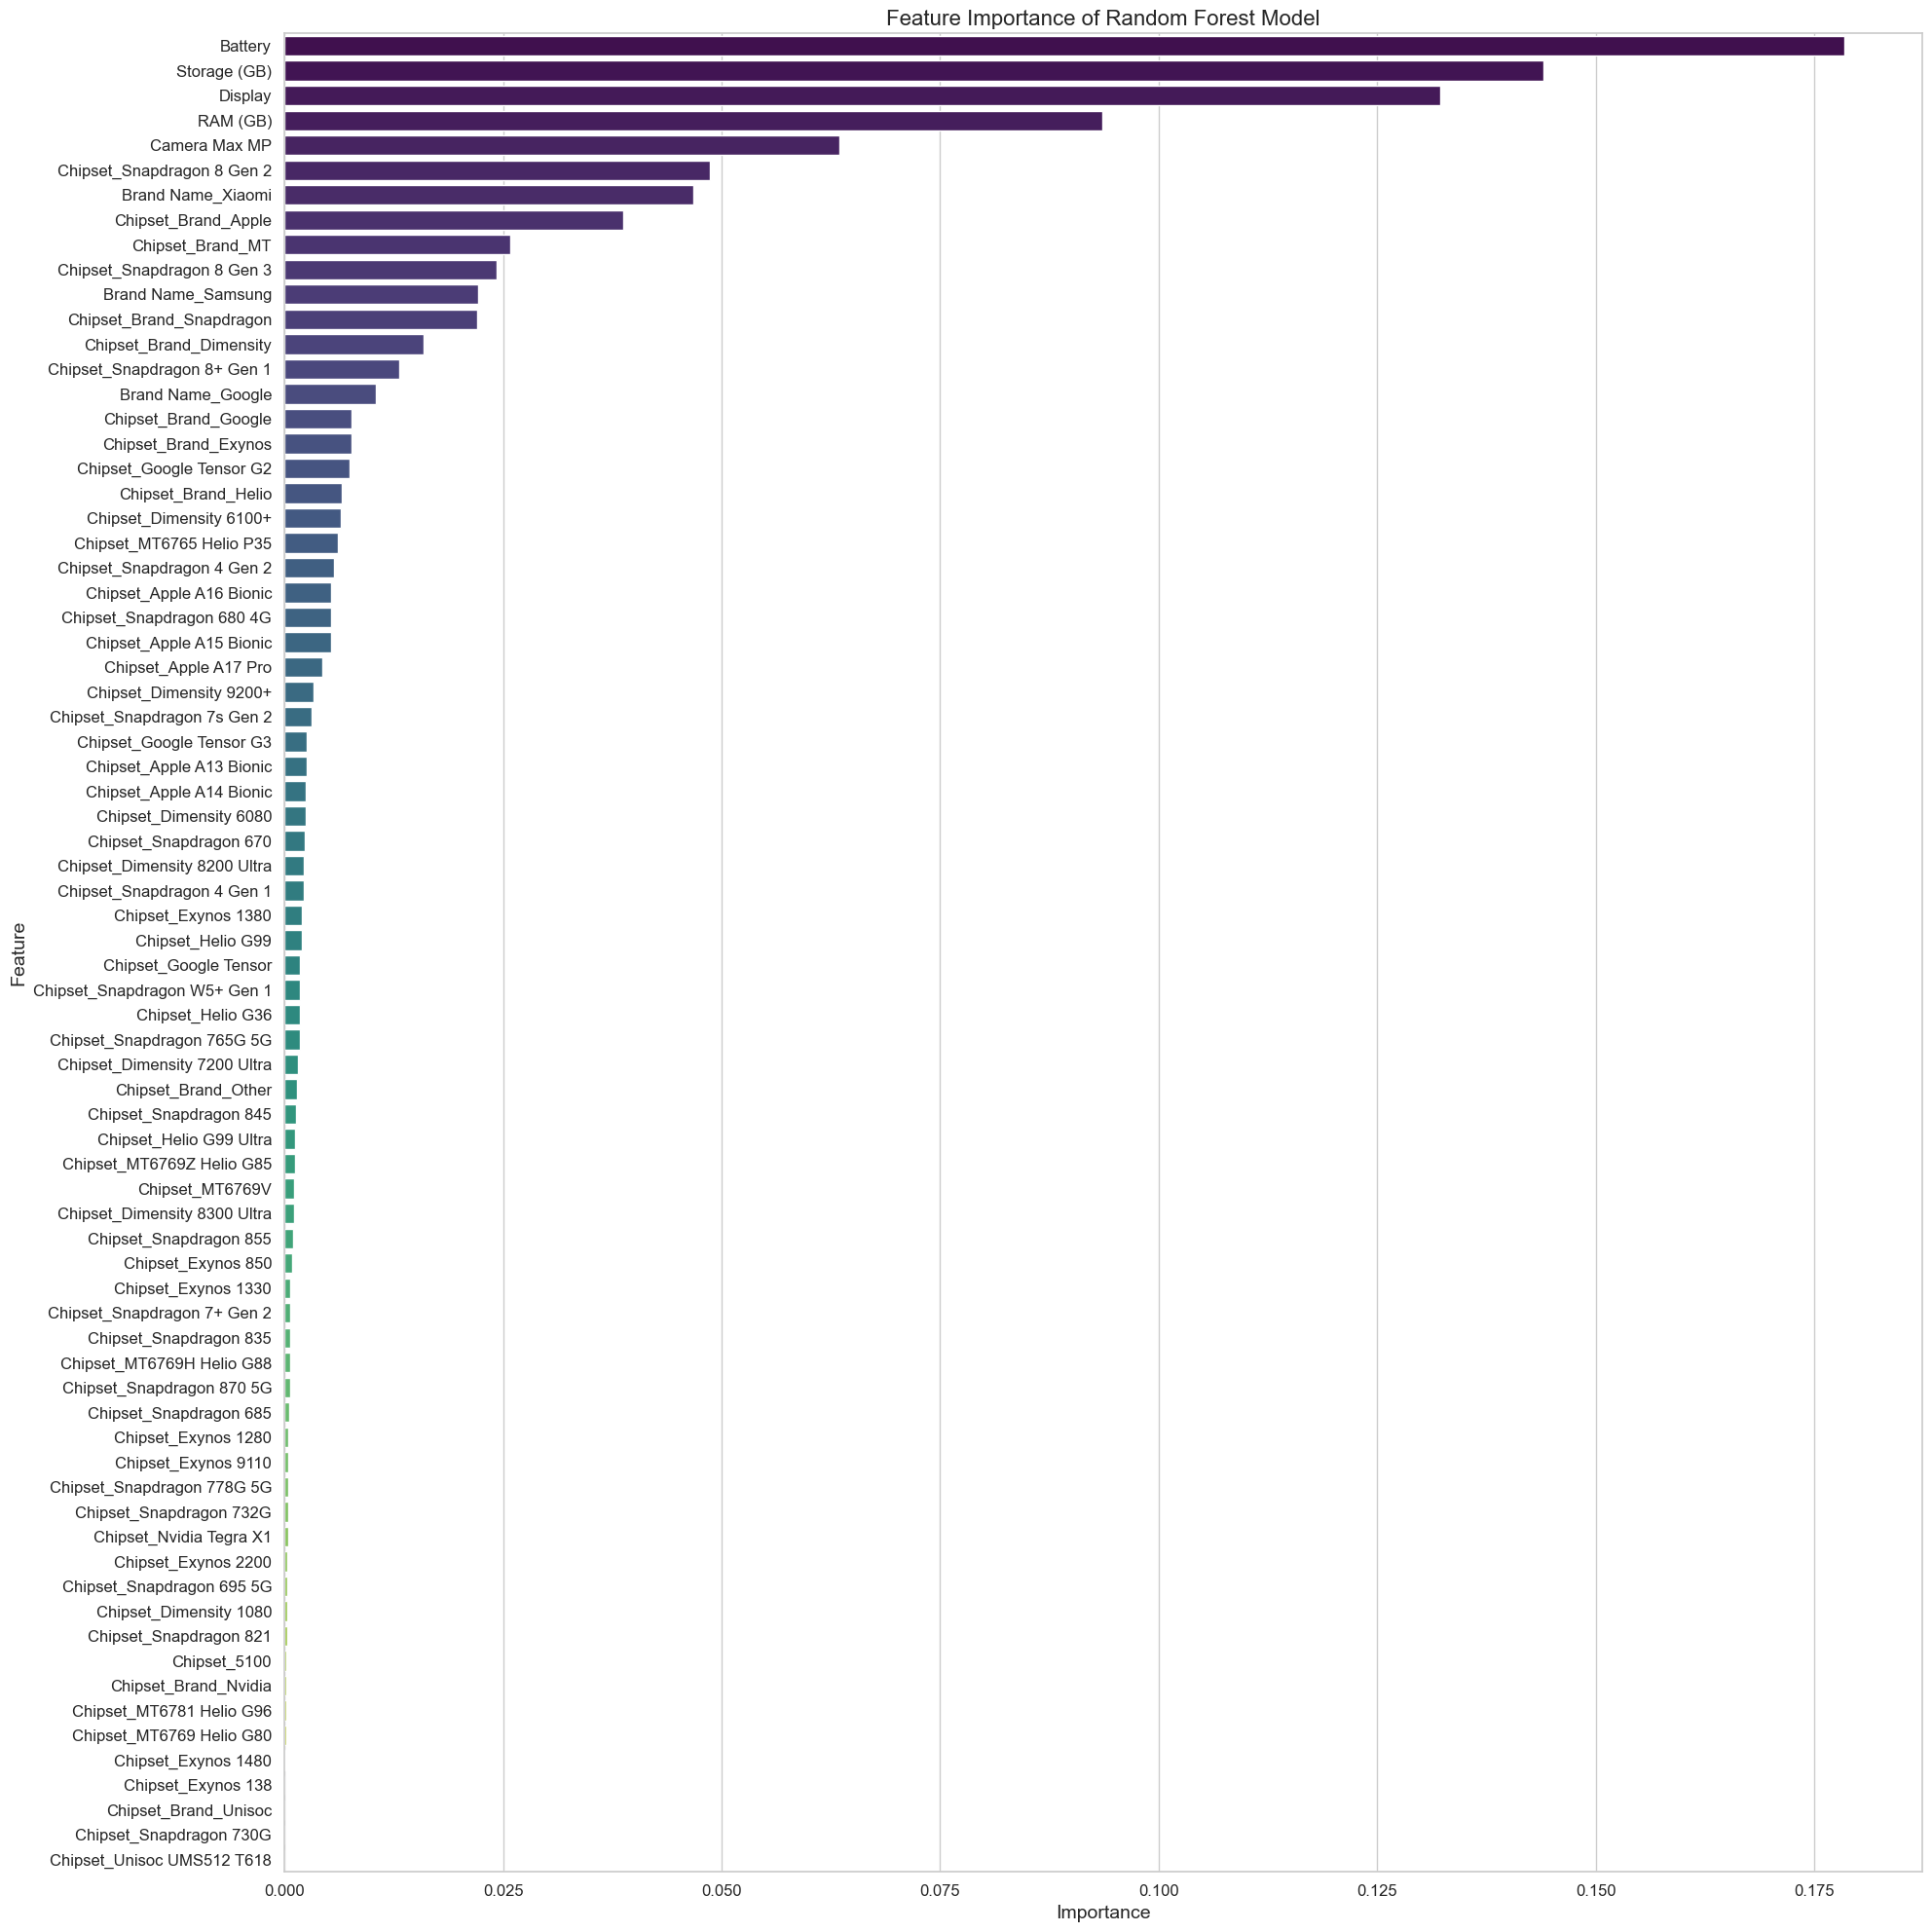

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


best_rf.fit(X_train, y_train)


feature_importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.set(style="whitegrid")


plt.figure(figsize=(20, 20))


ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance of Random Forest Model', fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

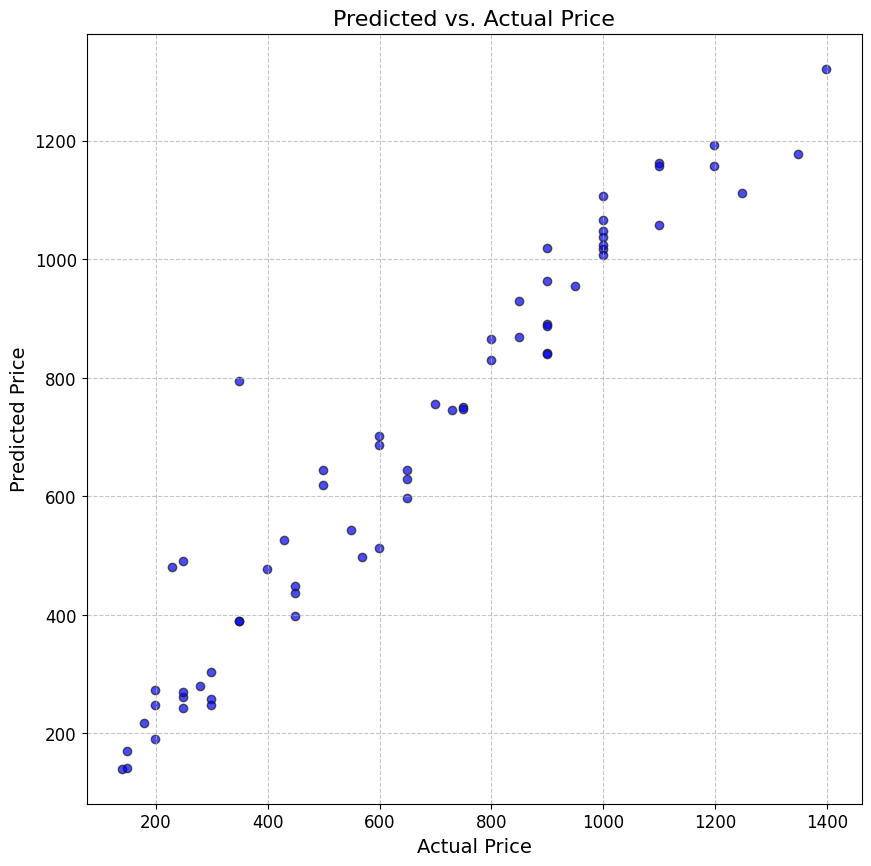

In [15]:
import matplotlib.pyplot as plt


plt.style.use('default')


plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
plt.title('Predicted vs. Actual Price', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

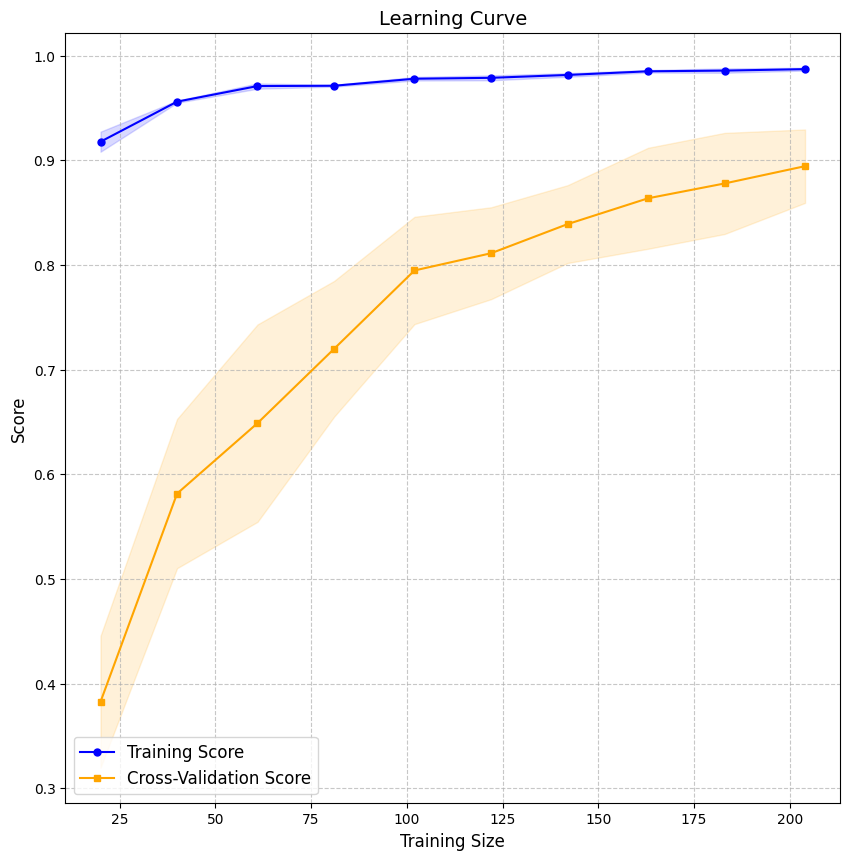

In [16]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score', linestyle='-')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='orange', marker='s', markersize=5, label='Cross-Validation Score', linestyle='-')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Size', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


plot_learning_curve(best_rf, X_train, y_train)